In [1]:
import numpy as np
import pandas as pd

In [27]:
columns_names = ['formula', 'db_center', 'ad_energy']
data = pd.read_csv('db_center.csv', names = columns_names)
data

,formula,db_center,ad_energy
0,Cu12Co,-1.33,-0.547
1,Cu12Rh,-1.57,-0.591
2,Cu12Ir,-1.74,-0.420
3,Cu12Ni,-1.21,-0.674
4,Cu12Pd,-2.01,-0.500
5,Cu12Pt,-1.78,-0.391
6,Cu13,-2.33,-0.316
7,Cu12Ag,-4.13,-0.201
8,Cu12Au,-3.12,-0.298


In [28]:
X = data['db_center'].values.reshape(-1,1) #reshape（-1，1）,变形为二维数组，第二个维度为1，第一个维度-1表示自动
y = data['ad_energy'].values

In [29]:
X,y

(array([[-1.33],
        [-1.57],
        [-1.74],
        [-1.21],
        [-2.01],
        [-1.78],
        [-2.33],
        [-4.13],
        [-3.12]]),
 array([-0.547, -0.591, -0.42 , -0.674, -0.5  , -0.391, -0.316, -0.201,
        -0.298]))

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y) #拟合

LinearRegression()

In [31]:
coef = lr.coef_ #获取斜率，斜率为数组
intercept = lr.intercept_ #获取截距
print(coef, intercept)

[-0.14221031] -0.7412535628655477


In [32]:
R2 = lr.score(X,y)
print(R2)

0.7646612597264623


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_true = y,y_pred = lr.predict(X))
mse = mean_squared_error(y_true = y,y_pred = lr.predict(X))

print('MAE =', mae)
print('MSE ='+str(mse)) #两种写法都可以

MAE = 0.05998761337416594
MSE =0.004916336690142974


In [34]:
predicts = lr.predict([[-2.2]])
predicts

array([-0.42839089])

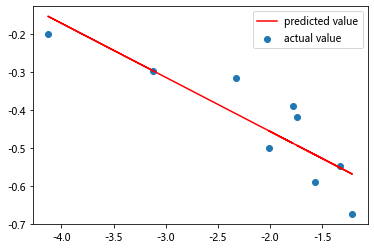

In [35]:
import matplotlib.pyplot as plt

x = data['db_center'].values
plt.scatter(x, y, label = 'actual value')
plt.plot(x, lr.predict(X), color = 'red', label = 'predicted value')
plt.legend()
plt.show()